<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Procrustes" data-toc-modified-id="Procrustes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Procrustes</a></span><ul class="toc-item"><li><span><a href="#Sum-of-squares" data-toc-modified-id="Sum-of-squares-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Sum of squares</a></span></li><li><span><a href="#Residuals" data-toc-modified-id="Residuals-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Residuals</a></span></li></ul></li><li><span><a href="#Protest" data-toc-modified-id="Protest-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Protest</a></span></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Compare all beta-div distance matrices via procrustes
* Assess how procrustes residuals group by dataset & metadata group
  * The analysis will help reveal differences in phylogenetic and trait relatedness among groups

# Var

In [1]:
# working dir
work_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/'

# PCoA objects
## phylogeny
phy_pcoa_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/beta-div_pcoa.qs'
## traits 
#trt_pcoa_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/beta-div_trt-maj.qs'
trt_pcoa_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/beta-div_trt-maj_pcoa.qs'
## COG
cog_pcoa_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/beta-div_cog_pcoa.qs'
## COG-categories
cogcat_pcoa_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/beta-div_cogcat_pcoa.qs'
## pfam
pfam_pcoa_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/beta-div_pfam_pcoa.qs'
## pfam-categories
pfamcat_pcoa_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/beta-div_pfamcat_pcoa.qs'


## filtered
#metadata_filt_file = file.path(work_dir, 'CurMetDat_metadata_filt-n1846.tsv')
## all 
base_in_dir = '/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval/'
metadata_file = file.path(base_in_dir, 'CurMetDat-metagenomes', 'files', 'metadata', 'Filtered_CurMetDat_ff.tsv')

# params
threads = 8

# Init

In [7]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
#library(dtplyr)
library(tidytable)
library(purrr)
library(ape)
library(phyloseq)
library(vegan)
library(LeyLabRMisc)

In [4]:
# library(future)
# library(future.batchtools)
# library(furrr)
# options(future.wait.interval = 2.0)

In [6]:
clustermq_setup()
df.dims()
setDTthreads(threads)

# Load

In [8]:
# reading in phylogeny-based PCoA
phy_pcoa = qs::qread(phy_pcoa_file, nthreads=threads)
names(phy_pcoa) = c('bray', 'jaccard', 'wunifrac_phy', 'unifrac_phy')
phy_pcoa %>% length

[1] 4

In [9]:
# reading in trait-based PCoA
trt_pcoa = qs::qread(trt_pcoa_file, nthreads=threads) 
names(trt_pcoa) = c('wunifrac_trt', 'unifrac_trt')
trt_pcoa %>% length

[1] 2

In [10]:
# reading in COG-based PCoA
cog_pcoa = qs::qread(cog_pcoa_file, nthreads=threads) 
names(cog_pcoa) = c('wunifrac_cog', 'unifrac_cog')
cog_pcoa %>% length

[1] 2

In [11]:
# reading in COGcat-based PCoA
cogcat_pcoa = qs::qread(cogcat_pcoa_file, nthreads=threads) 
names(cogcat_pcoa) = c('wunifrac_cogcat', 'unifrac_cogcat')
cogcat_pcoa %>% length

[1] 2

In [12]:
# reading in pfam-based PCoA
pfam_pcoa = qs::qread(pfam_pcoa_file, nthreads=threads) 
names(pfam_pcoa) = c('wunifrac_pfam', 'unifrac_pfam')
pfam_pcoa %>% length

[1] 2

In [13]:
# reading in pfamcat-based PCoA
pfamcat_pcoa = qs::qread(pfamcat_pcoa_file, nthreads=threads) 
names(pfamcat_pcoa) = c('wunifrac_pfamcat', 'unifrac_pfamcat')
pfamcat_pcoa %>% length

[1] 2

In [14]:
# combining
pcoa_all = c(phy_pcoa, trt_pcoa, cog_pcoa, cogcat_pcoa, pfam_pcoa, pfamcat_pcoa)
pcoa_all %>% names

[1] "bray"             "jaccard"          "wunifrac_phy"     "unifrac_phy"     
 [5] "wunifrac_trt"     "unifrac_trt"      "wunifrac_cog"     "unifrac_cog"     
 [9] "wunifrac_cogcat"  "unifrac_cogcat"   "wunifrac_pfam"    "unifrac_pfam"    
[13] "wunifrac_pfamcat" "unifrac_pfamcat"

In [16]:
# all  metadata
meta = Fread(metadata_file) %>%
    mutate.(Sample = gsub('-', '.', Sample))
meta %>% unique_n('Samples', Sample)
meta

No. of unique Samples: 2943 


dataset_name          Sample            subjectID         body_site
1    Bengtsson-PalmeJ_2015 TRAVELRES1        TRAVELRES1_2      stool    
2    Bengtsson-PalmeJ_2015 TRAVELRES11       TRAVELRES11_12    stool    
⋮    ⋮                     ⋮                 ⋮                 ⋮        
2942 ZeeviD_2015           PNP_Validation_45 PNP_Validation_45 stool    
2943 ZeeviD_2015           PNP_Validation_46 PNP_Validation_46 stool    
     antibiotics_current_use study_condition disease age age_category gender ⋯
1    no                      control         healthy 25  adult        female ⋯
2    no                      control         healthy 22  adult        female ⋯
⋮    ⋮                       ⋮               ⋮       ⋮   ⋮            ⋮      ⋱
2942 no                      control         healthy NA  adult               ⋯
2943 no                      control         healthy NA  adult               ⋯
     glp_1 travel_destination urea_nitrogen disease_stage uncurated_metadata
1    NA                       NA            NA                              
2    NA                       NA            NA                              
⋮    ⋮     ⋮                  ⋮             ⋮             ⋮                 
2942 NA                       NA            NA                              
2943 NA                       NA            NA                              
     family_member subject_n samp_n westernized samps_per_study
1                  1         1      TRUE        36             
2                  1         1      TRUE        36             
⋮    ⋮             ⋮         ⋮      ⋮           ⋮              
2942               1         1      TRUE        446            
2943               1         1      TRUE        446

In [18]:
# # filtered
# meta_f = Fread(metadata_filt_file) %>%
#     mutate.(Sample = gsub('-', '.', Sample))
# meta_f %>% unique_n('Samples', Sample)
# meta_f

# Procrustes

In [19]:
dists = c('bray', 
          'jaccard', 
          'unifrac_phy', 
          'unifrac_trt',
          'unifrac_cog',
          'unifrac_cogcat',
          'unifrac_pfam',
          'unifrac_pfamcat',
          'wunifrac_phy', 
          'wunifrac_trt', 
          'wunifrac_cog', 
          'wunifrac_cogcat', 
          'wunifrac_pfam', 
          'wunifrac_pfamcat')

In [21]:
# pairwise Procrustes
run_proc = function(x, pcoa_list){
    x = as.character(as.matrix(x))
    vegan::procrustes(pcoa_list[[x[1]]], pcoa_list[[x[2]]], symmetric=TRUE)
}

## creating pairwise set
pairwise_dists = expand.grid(dists,dists) %>%
    filter(Var1 != Var2) 
cat('Number of pairwise comparisons:', nrow(pairwise_dists), '\n')

## run in parallel 
doParallel::registerDoParallel(8)
proc_all = pairwise_dists %>%  
    #head(n=3) %>%   # debug
    split(seq(nrow(.))) %>%
    plyr::llply(run_proc, pcoa_list=pcoa_all, .parallel=FALSE)

proc_all %>% length

Number of pairwise comparisons: 182 


[1] 182

In [22]:
# adding names to list
L_names = pairwise_dists %>% unite(dist_comp, Var1, Var2, sep=':') %>% .$dist_comp
names(proc_all) = L_names[1:length(proc_all)]
names(proc_all) %>% head

[1] "jaccard:bray"        "unifrac_phy:bray"    "unifrac_trt:bray"   
[4] "unifrac_cog:bray"    "unifrac_cogcat:bray" "unifrac_pfam:bray"

In [23]:
# saving results
procrustes_file = file.path(work_dir, 'beta-div_UniRef90_procrustes-sym.qs')
qs::qsave(proc_all, procrustes_file, nthreads=threads)
cat('File written:', procrustes_file, '\n')

File written: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity//beta-div_UniRef90_procrustes-sym.qs 


In [24]:
# re-loading results
procrustes_file = file.path(work_dir, 'beta-div_UniRef90_procrustes-sym.qs')
proc_all = qs::qread(procrustes_file, nthreads=threads)
proc_all %>% length

[1] 182

## Sum of squares

In [25]:
# getting sums of squares
proc_all_ss = proc_all %>%
    plyr::llply(function(x) x$ss) %>%
    do.call(rbind, .) %>%
    as.data.frame
                
proc_all_ss$dists = rownames(proc_all_ss)
proc_all_ss = proc_all_ss %>%
    separate(dists, c('dist_x', 'dist_y'), sep=':')
                
proc_all_ss

V1         dist_x          dist_y          
jaccard:bray                     0.02439978 jaccard         bray            
unifrac_phy:bray                 0.34634824 unifrac_phy     bray            
⋮                                ⋮          ⋮               ⋮               
wunifrac_cogcat:wunifrac_pfamcat 0.3186036  wunifrac_cogcat wunifrac_pfamcat
wunifrac_pfam:wunifrac_pfamcat   0.1113888  wunifrac_pfam   wunifrac_pfamcat

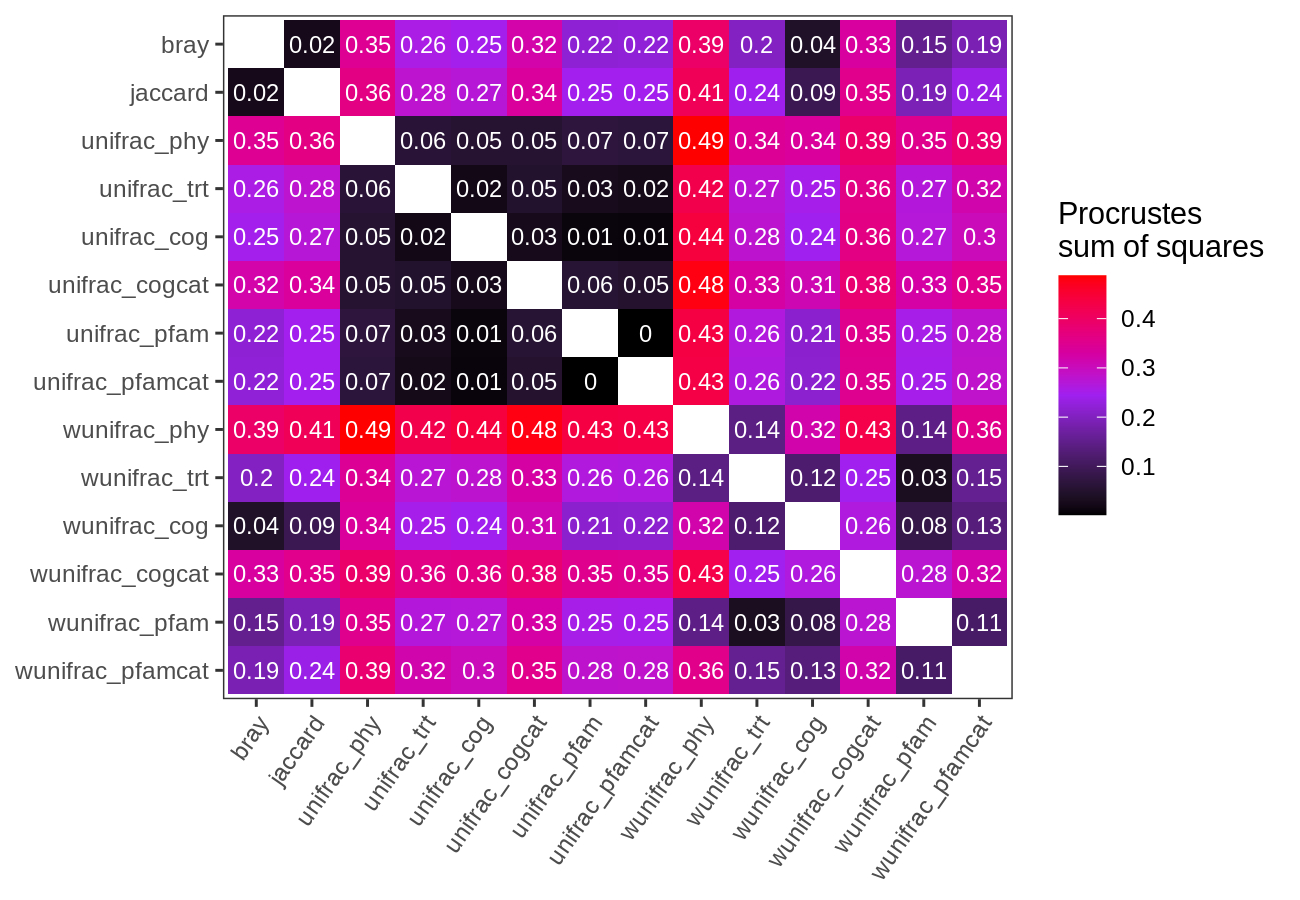

In [26]:
p = proc_all_ss %>%
    mutate(dist_x = factor(dist_x, levels=dists),
           dist_y = factor(dist_y, levels=rev(dists))) %>%
    ggplot(aes(dist_x, dist_y, fill=V1)) +
    #geom_point(alpha=0.2) + 
    #geom_point(alpha=0.5, shape='O') +
    geom_tile() +
    #scale_size_continuous('Procrustes\nsum of squares') +
    geom_text(aes(label=round(V1, 2)), color='white', size=3) +
    scale_fill_gradientn('Procrustes\nsum of squares', 
                         colors=c('black', 'purple',  'red')) +
    theme_bw() +
    theme(
        panel.grid = element_blank(),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.x = element_text(angle=55, hjust=1)
    )

p.dims(6.5,4.5)
plot(p)

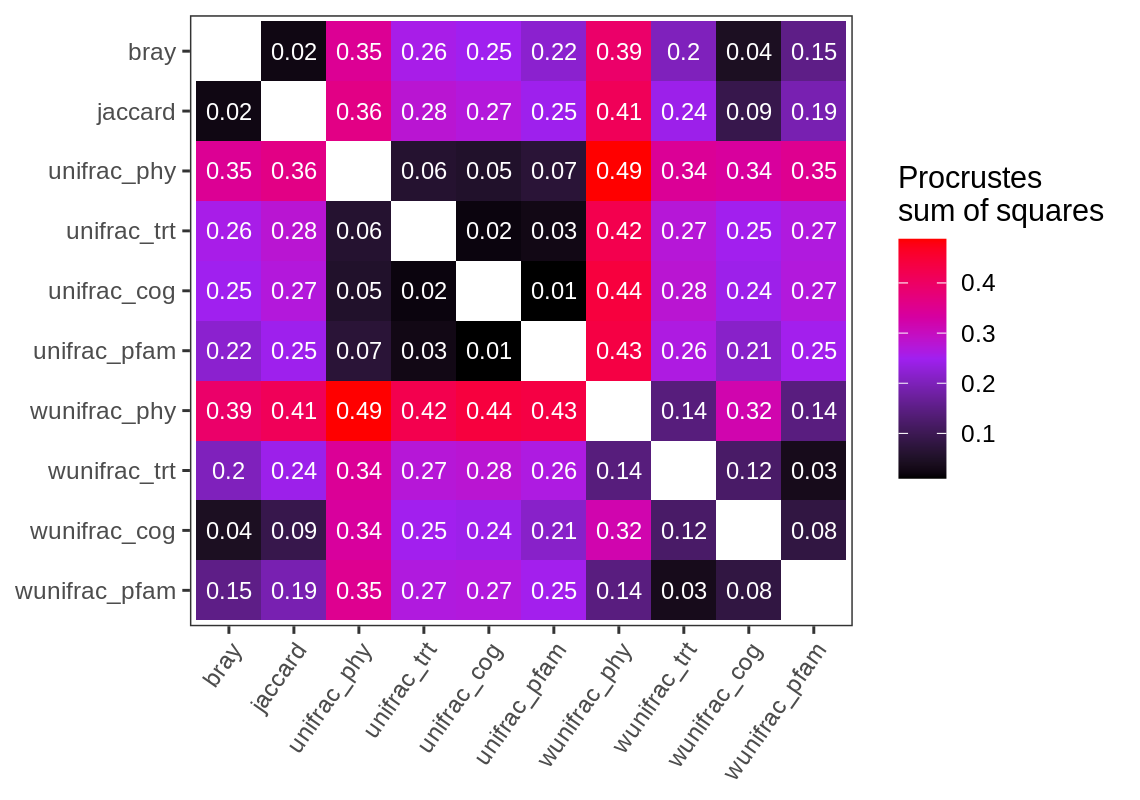

In [27]:
p = proc_all_ss %>%
    filter(!grepl('cat$', dist_x),
           !grepl('cat$', dist_y)) %>%
    mutate(dist_x = factor(dist_x, levels=dists),
           dist_y = factor(dist_y, levels=rev(dists))) %>%
    ggplot(aes(dist_x, dist_y, fill=V1)) +
    geom_tile() +
    geom_text(aes(label=round(V1, 2)), color='white', size=3) +
    scale_fill_gradientn('Procrustes\nsum of squares', 
                         colors=c('black', 'purple',  'red')) +
    theme_bw() +
    theme(
        panel.grid = element_blank(),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        axis.text.x = element_text(angle=55, hjust=1)
    )

p.dims(5.7,4)
plot(p)

## Residuals

In [28]:
# getting sums of squares
doParallel::registerDoParallel(threads)
proc_all_res = proc_all %>%
    #head(n=3) %>%
    plyr::llply(function(x) x %>% residuals %>% as.data.frame, .parallel=TRUE) %>%
    do.call(rbind, .)

colnames(proc_all_res) = c('residuals')
proc_all_res$dists = rownames(proc_all_res) 
proc_all_res = proc_all_res %>%
    mutate(dists = gsub('^([A-Za-z_]+):([A-Za-z_]+)\\.(.+)', '\\1:\\2:\\3', dists)) %>%
    separate(dists, c('dist_x', 'dist_y', 'sample'), sep=':')             
                
proc_all_res

residuals   dist_x       
jaccard:bray.A01_02_1FE                        0.004416450 jaccard      
jaccard:bray.A02_01_1FE                        0.003361227 jaccard      
⋮                                              ⋮           ⋮            
wunifrac_pfam:wunifrac_pfamcat.YSZC12003_37879 0.004793669 wunifrac_pfam
wunifrac_pfam:wunifrac_pfamcat.YSZC12003_37880 0.004435725 wunifrac_pfam
                                               dist_y           sample         
jaccard:bray.A01_02_1FE                        bray             A01_02_1FE     
jaccard:bray.A02_01_1FE                        bray             A02_01_1FE     
⋮                                              ⋮                ⋮              
wunifrac_pfam:wunifrac_pfamcat.YSZC12003_37879 wunifrac_pfamcat YSZC12003_37879
wunifrac_pfam:wunifrac_pfamcat.YSZC12003_37880 wunifrac_pfamcat YSZC12003_37880

In [29]:
x = proc_all_res %>%
    inner_join.(combn(dists, 2) %>% t %>% as.data.frame, 
                  c('dist_x'='V2', 'dist_y'='V1'))
proc_all_res = bind_rows.(x, x %>% 
                            rename.('dist_X' = dist_y, 'dist_y' = dist_x) %>%
                            rename.('dist_x' = 'dist_X'))
proc_all_res

residuals   dist_x        dist_y           sample         
1      0.004416450 jaccard       bray             A01_02_1FE     
2      0.003361227 jaccard       bray             A02_01_1FE     
⋮      ⋮           ⋮             ⋮                ⋮              
535625 0.004832623 wunifrac_pfam wunifrac_pfamcat YSZC12003_37879
535626 0.005243793 wunifrac_pfam wunifrac_pfamcat YSZC12003_37880

In [30]:
# checking key overlap
overlap(proc_all_res$sample, meta$Sample)

intersect(x,y): 2943 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 2943 


In [31]:
# adding metadata
proc_all_res = proc_all_res %>%
    as.data.table %>%
    rename.('Sample'=sample) %>%
    inner_join.(meta, by=c('Sample')) %>%
    as.data.frame %>%
    as.data.table
proc_all_res

residuals   dist_x          dist_y           Sample           
1      0.000914605 jaccard         bray             TRAVELRES1       
2      0.015152638 unifrac_phy     bray             TRAVELRES1       
⋮      ⋮           ⋮               ⋮                ⋮                
535625 0.01823773  wunifrac_cogcat wunifrac_pfamcat PNP_Validation_46
535626 0.01290090  wunifrac_pfam   wunifrac_pfamcat PNP_Validation_46
       dataset_name          subjectID         body_site
1      Bengtsson-PalmeJ_2015 TRAVELRES1_2      stool    
2      Bengtsson-PalmeJ_2015 TRAVELRES1_2      stool    
⋮      ⋮                     ⋮                 ⋮        
535625 ZeeviD_2015           PNP_Validation_46 stool    
535626 ZeeviD_2015           PNP_Validation_46 stool    
       antibiotics_current_use study_condition disease ⋯ glp_1
1      no                      control         healthy ⋯ NA   
2      no                      control         healthy ⋯ NA   
⋮      ⋮                       ⋮               ⋮       ⋱ ⋮    
535625 no                      control         healthy ⋯ NA   
535626 no                      control         healthy ⋯ NA   
       travel_destination urea_nitrogen disease_stage uncurated_metadata
1                         NA            NA                              
2                         NA            NA                              
⋮      ⋮                  ⋮             ⋮             ⋮                 
535625                    NA            NA                              
535626                    NA            NA                              
       family_member subject_n samp_n westernized samps_per_study
1                    1         1      TRUE        36             
2                    1         1      TRUE        36             
⋮      ⋮             ⋮         ⋮      ⋮           ⋮              
535625               1         1      TRUE        446            
535626               1         1      TRUE        446

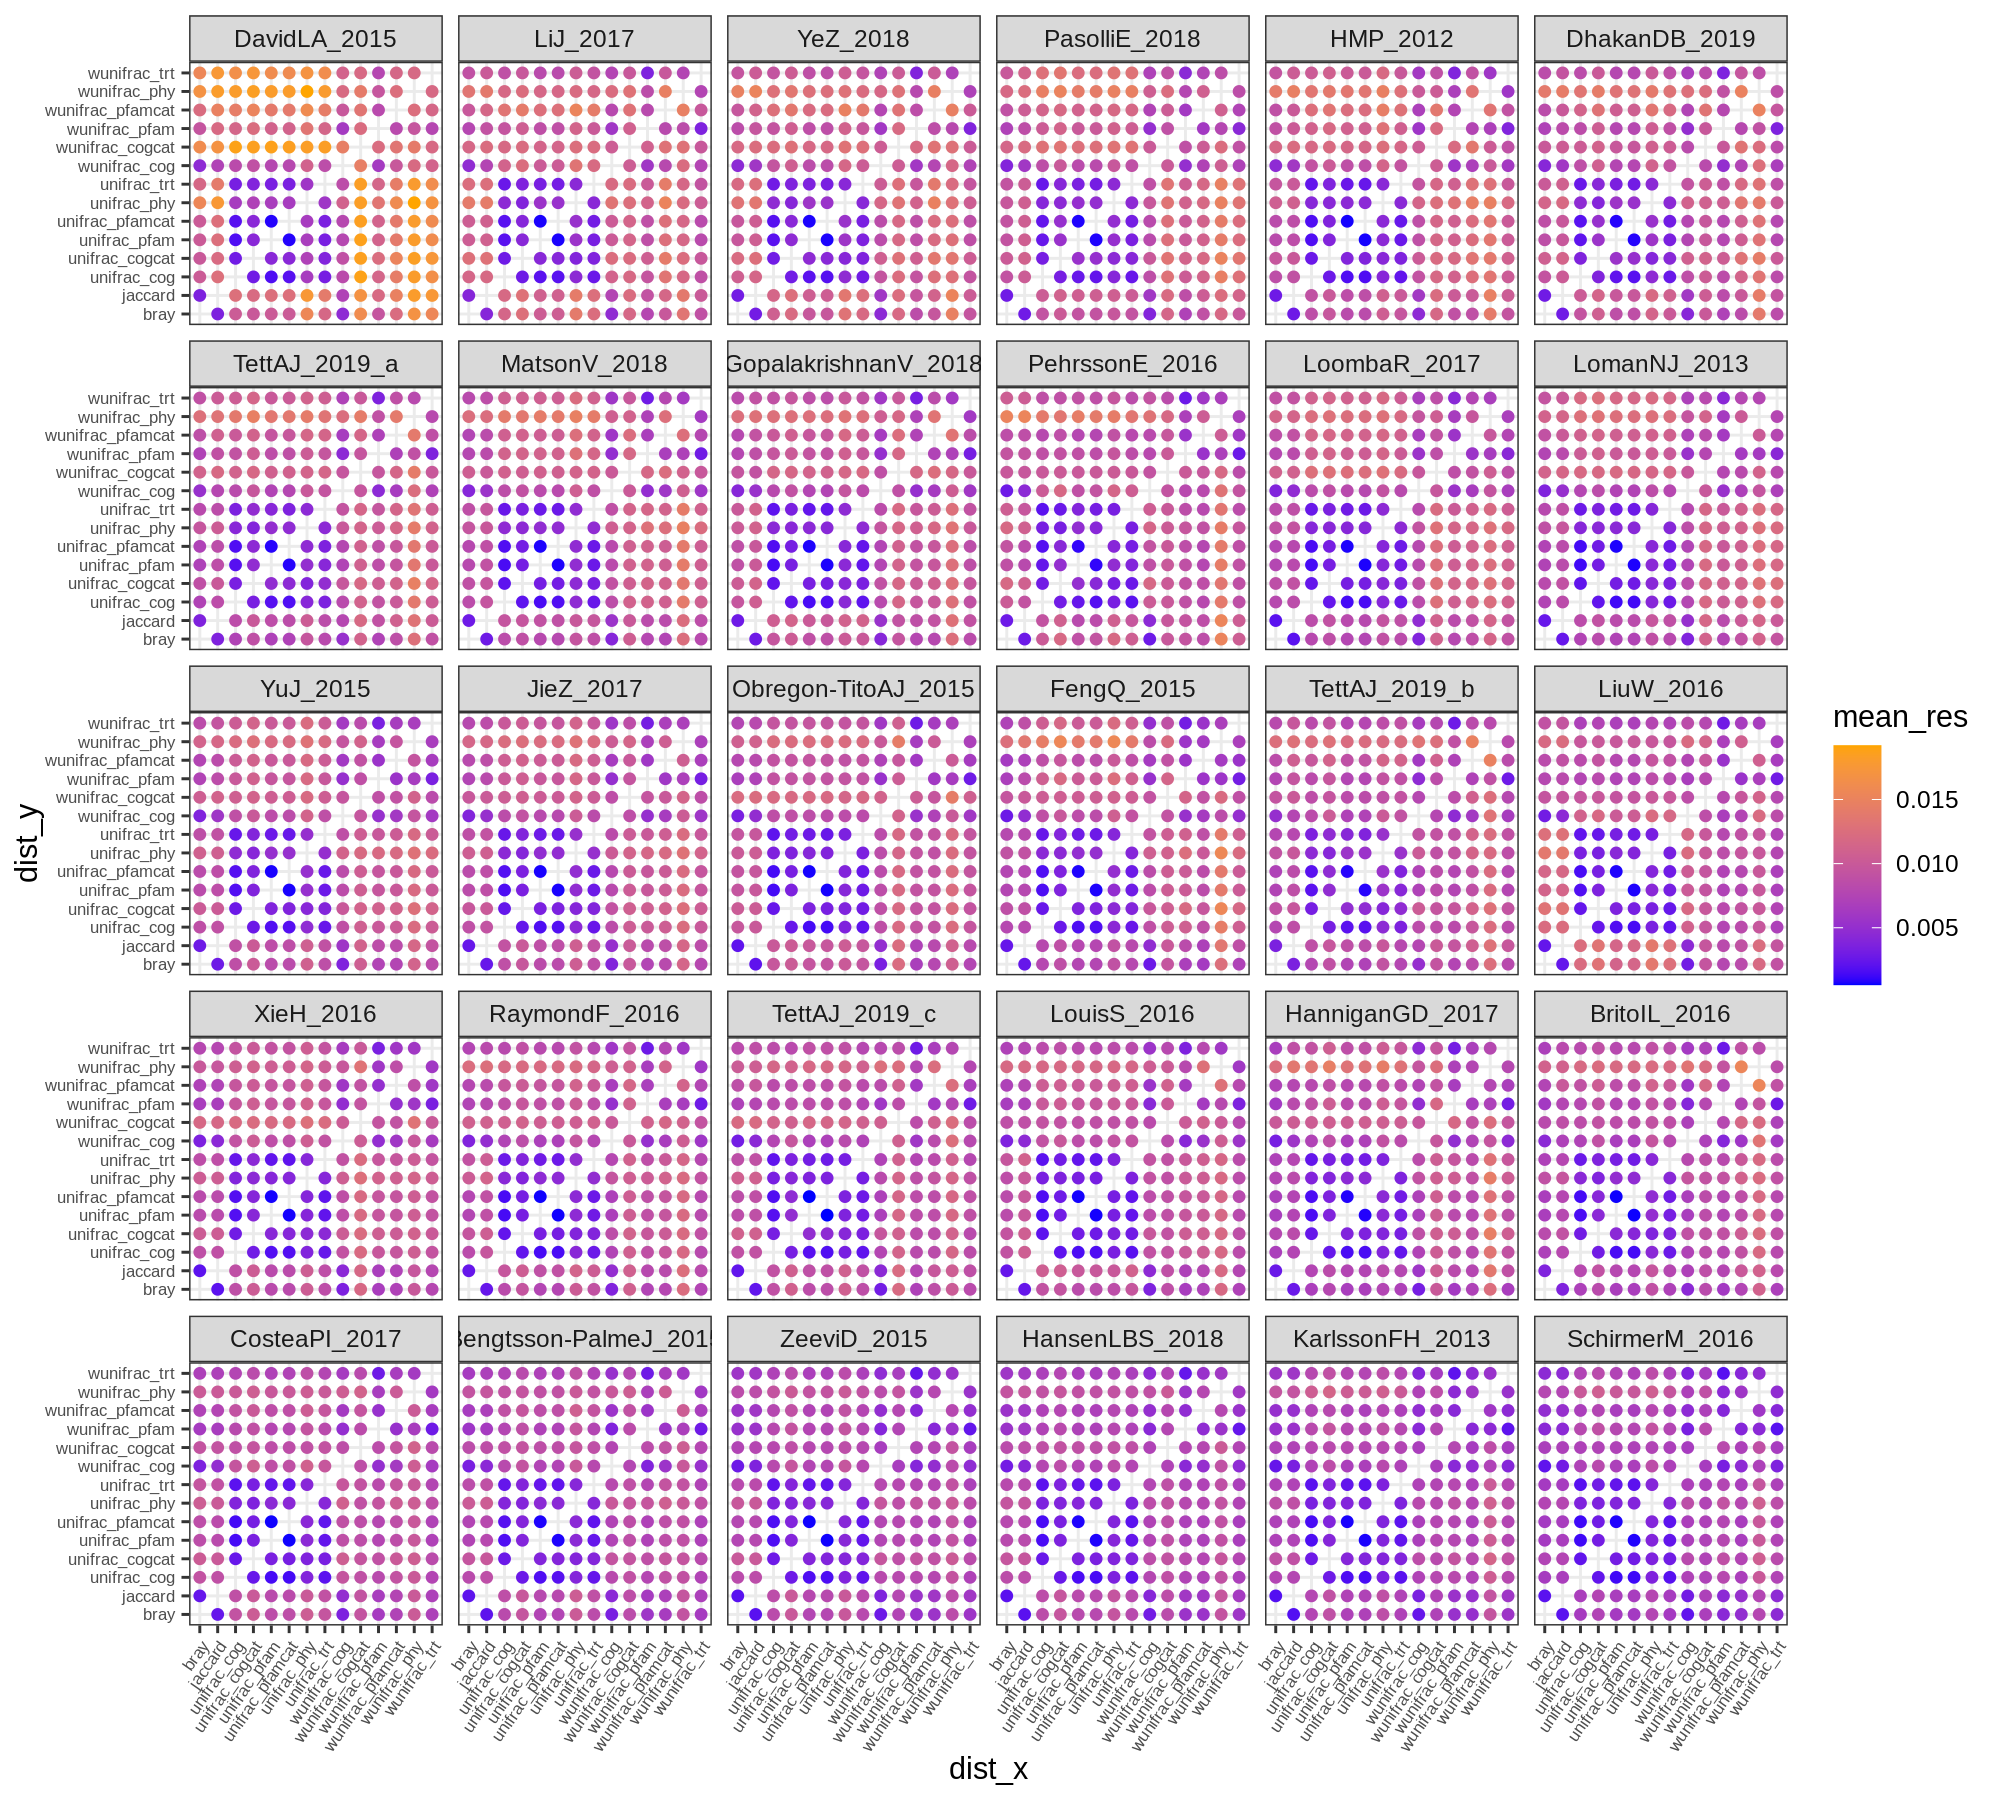

In [33]:
# plotting
p = proc_all_res %>%
    mutate.(total_mean_res = mean(residuals),
            .by=c(dataset_name)) %>%
    summarize.(mean_res = mean(residuals),
               sd_res = sd(residuals) / sqrt(length(residuals)), 
               .by=c(dist_x, dist_y, dataset_name, total_mean_res)) %>%
    filter.(total_mean_res >= 0.005) %>%
    mutate.(dataset_name = reorder(dataset_name, -total_mean_res)) %>%
    ggplot(aes(dist_x, dist_y, color=mean_res)) +
#    geom_linerange(aes(ymin=mean_res-sd_res,
#                       ymax=mean_res+sd_res)) +
    geom_point() +
    scale_color_gradient(low = 'blue', high = 'orange') +
    facet_wrap(~ dataset_name) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1, size=6),
        axis.text.y = element_text(size=6)
    )

p.dims(10,9)
plot(p)

In [34]:
# formatting
## summaring, just lower-tri
proc_all_res_s = proc_all_res %>%
    filter.(!is.na(disease)) %>%
    mutate.(total_mean_res = mean(residuals),
            .by=c(disease)) %>%
    summarize.(mean_res = mean(residuals),
               sd_res = sd(residuals) / sqrt(length(residuals)), 
               .by=c(dist_x, dist_y, disease, total_mean_res, study_condition)) %>%
    distinct.(dist_x, dist_y, disease, .keep_all = TRUE)
proc_all_res_s 

dist_x          dist_y           disease total_mean_res study_condition
1    jaccard         bray             healthy 0.007498604    control        
2    unifrac_phy     bray             healthy 0.007498604    control        
⋮    ⋮               ⋮                ⋮       ⋮              ⋮              
2365 wunifrac_cogcat wunifrac_pfamcat STEC    0.008422179    STEC           
2366 wunifrac_pfam   wunifrac_pfamcat STEC    0.008422179    STEC           
     mean_res    sd_res      
1    0.002486615 3.258521e-05
2    0.009666788 8.993408e-05
⋮    ⋮           ⋮           
2365 0.008257511 0.0006204790
2366 0.006301810 0.0004240664

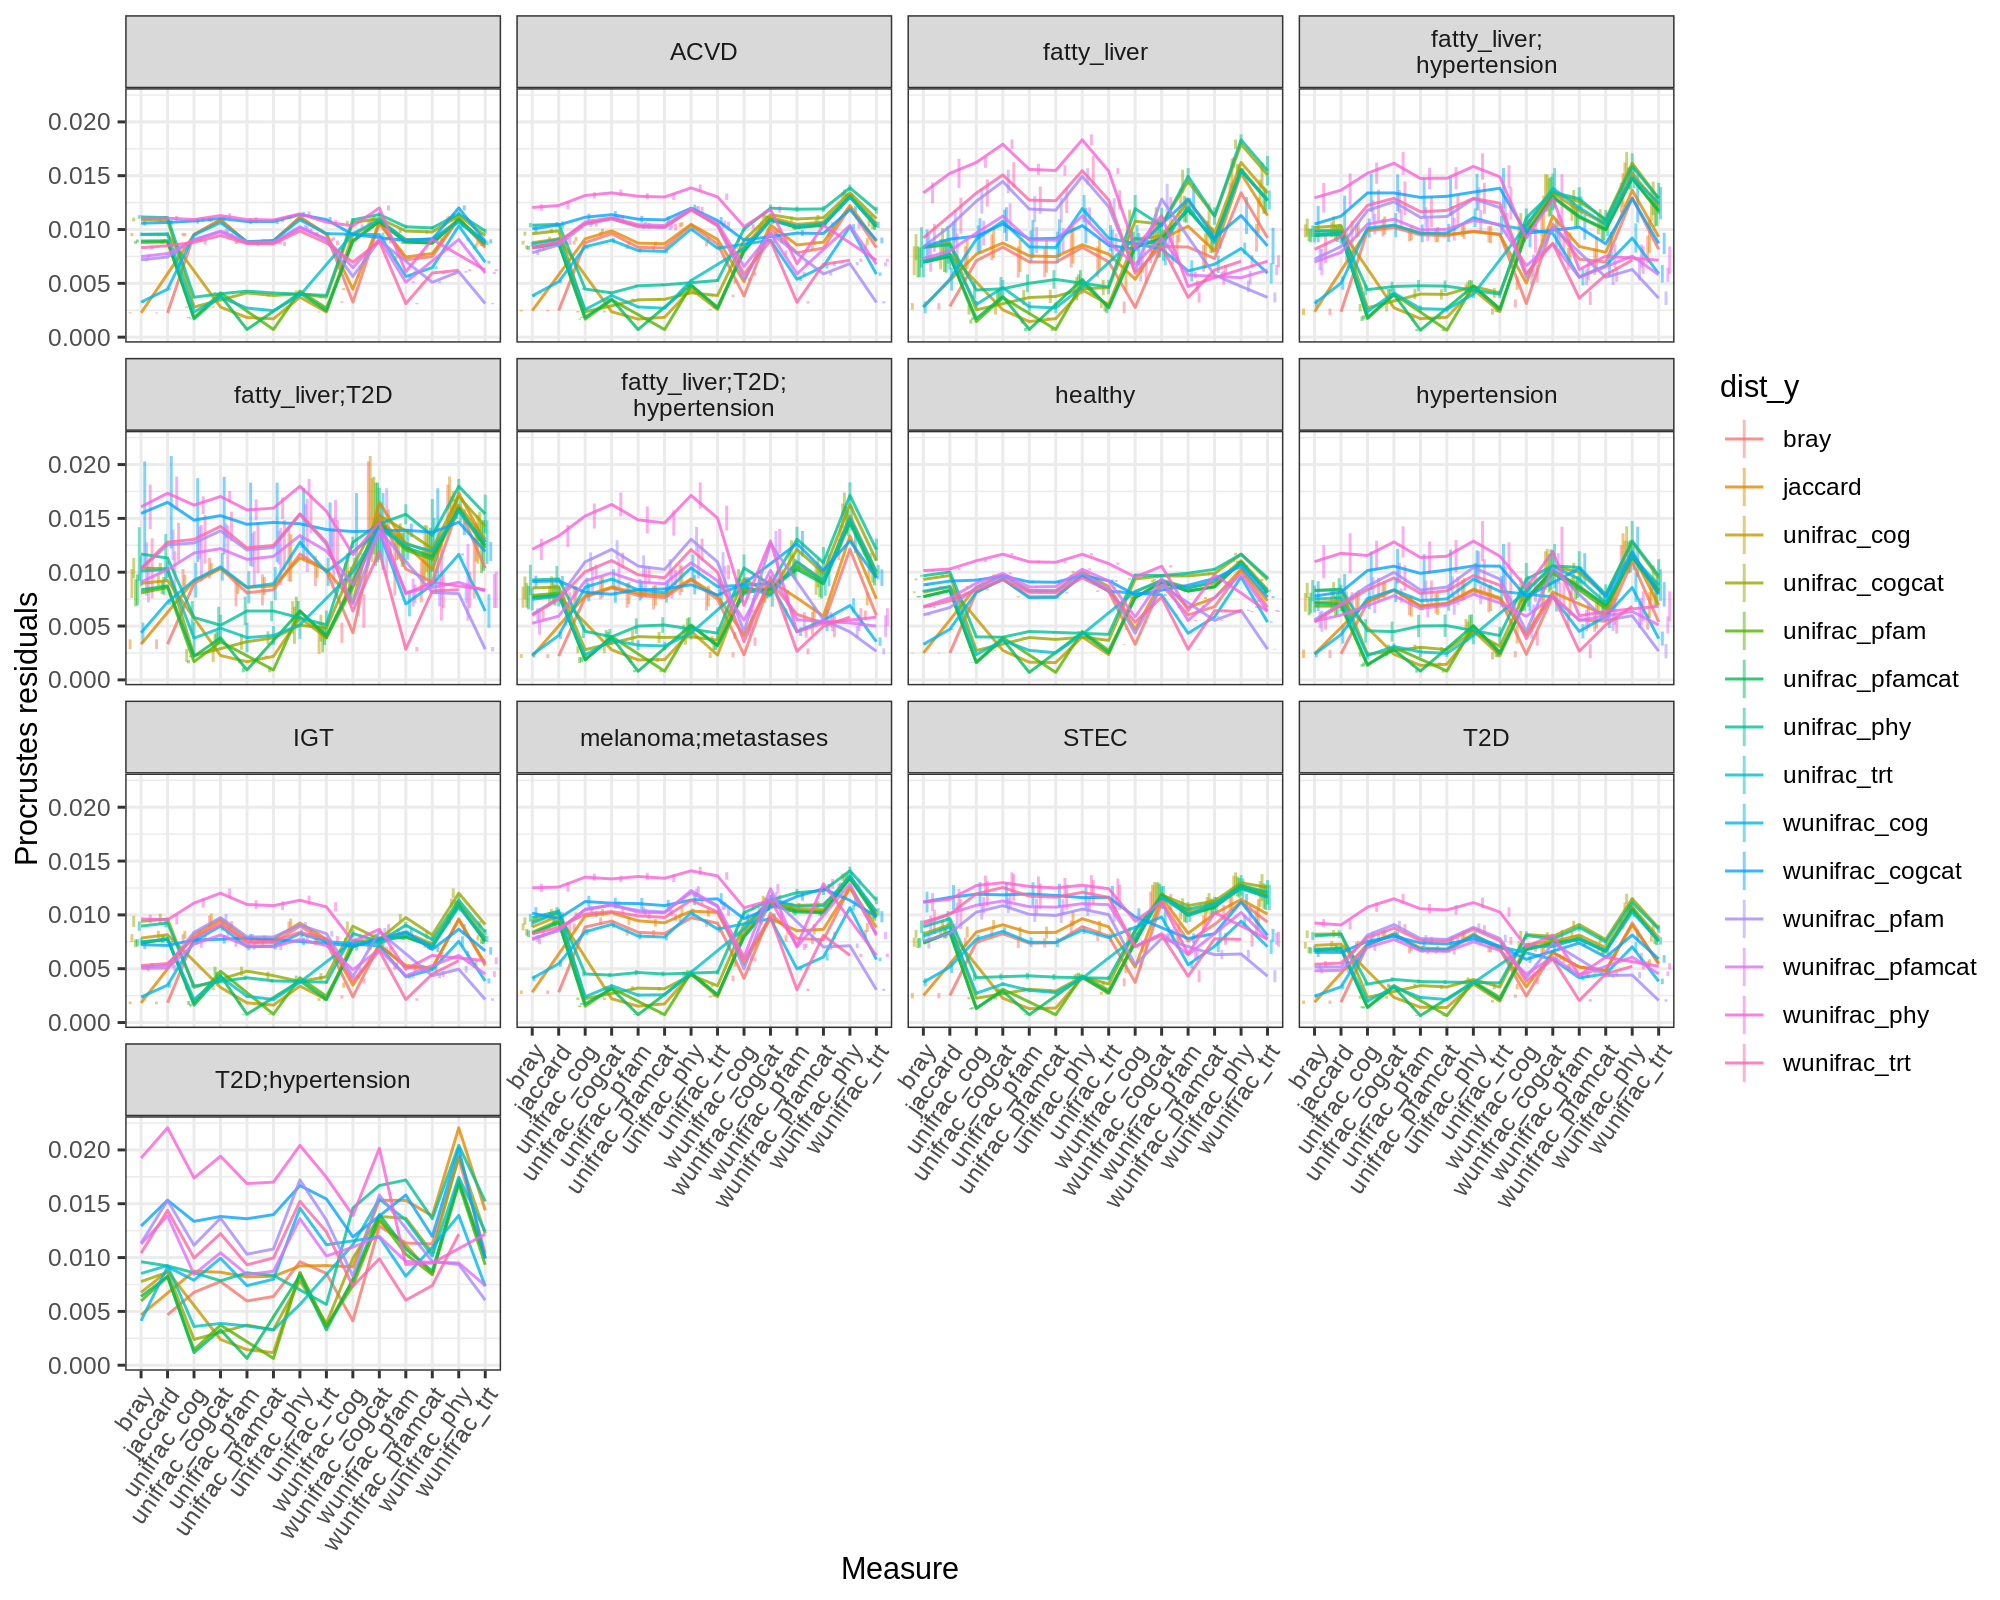

In [35]:
# plotting
p = proc_all_res_s %>%
    mutate.(disease = reorder(disease, -total_mean_res),
            sd_res = ifelse(is.na(sd_res), 0, sd_res)) %>%
    mutate.(disease = stringr::str_wrap(gsub(';', '; ', disease), 20),
            disease = gsub('; ', ';', disease)) %>%
    ggplot(aes(dist_x, mean_res, color=dist_y, group=dist_y)) +
    geom_linerange(aes(ymin=mean_res-sd_res,
                       ymax=mean_res+sd_res),
                   position=position_dodge(width=0.9),
                   alpha=0.5) +
    geom_line(alpha=0.8) +
    labs(x='Measure', y='Procrustes residuals') +
    facet_wrap(~ disease) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    ) 
p.dims(10,8)
plot(p)

In [36]:
# formatting
## summaring, just lower-tri
proc_all_res_s = proc_all_res %>%
    filter.(!is.na(disease)) %>%
    mutate.(total_mean_res = mean(residuals),
            .by=c(disease)) %>%
    summarize.(mean_res = mean(residuals),
               sd_res = sd(residuals) / sqrt(length(residuals)), 
               .by=c(dist_x, disease, total_mean_res)) %>%
    distinct.(dist_x, disease, .keep_all = TRUE)
proc_all_res_s 

dist_x           disease total_mean_res mean_res    sd_res      
1   jaccard          healthy 0.007498604    0.007842304 2.792220e-05
2   unifrac_phy      healthy 0.007498604    0.007809280 2.897373e-05
⋮   ⋮                ⋮       ⋮              ⋮           ⋮           
181 wunifrac_pfamcat STEC    0.008422179    0.009579063 0.0002080516
182 bray             STEC    0.008422179    0.007848270 0.0002080779

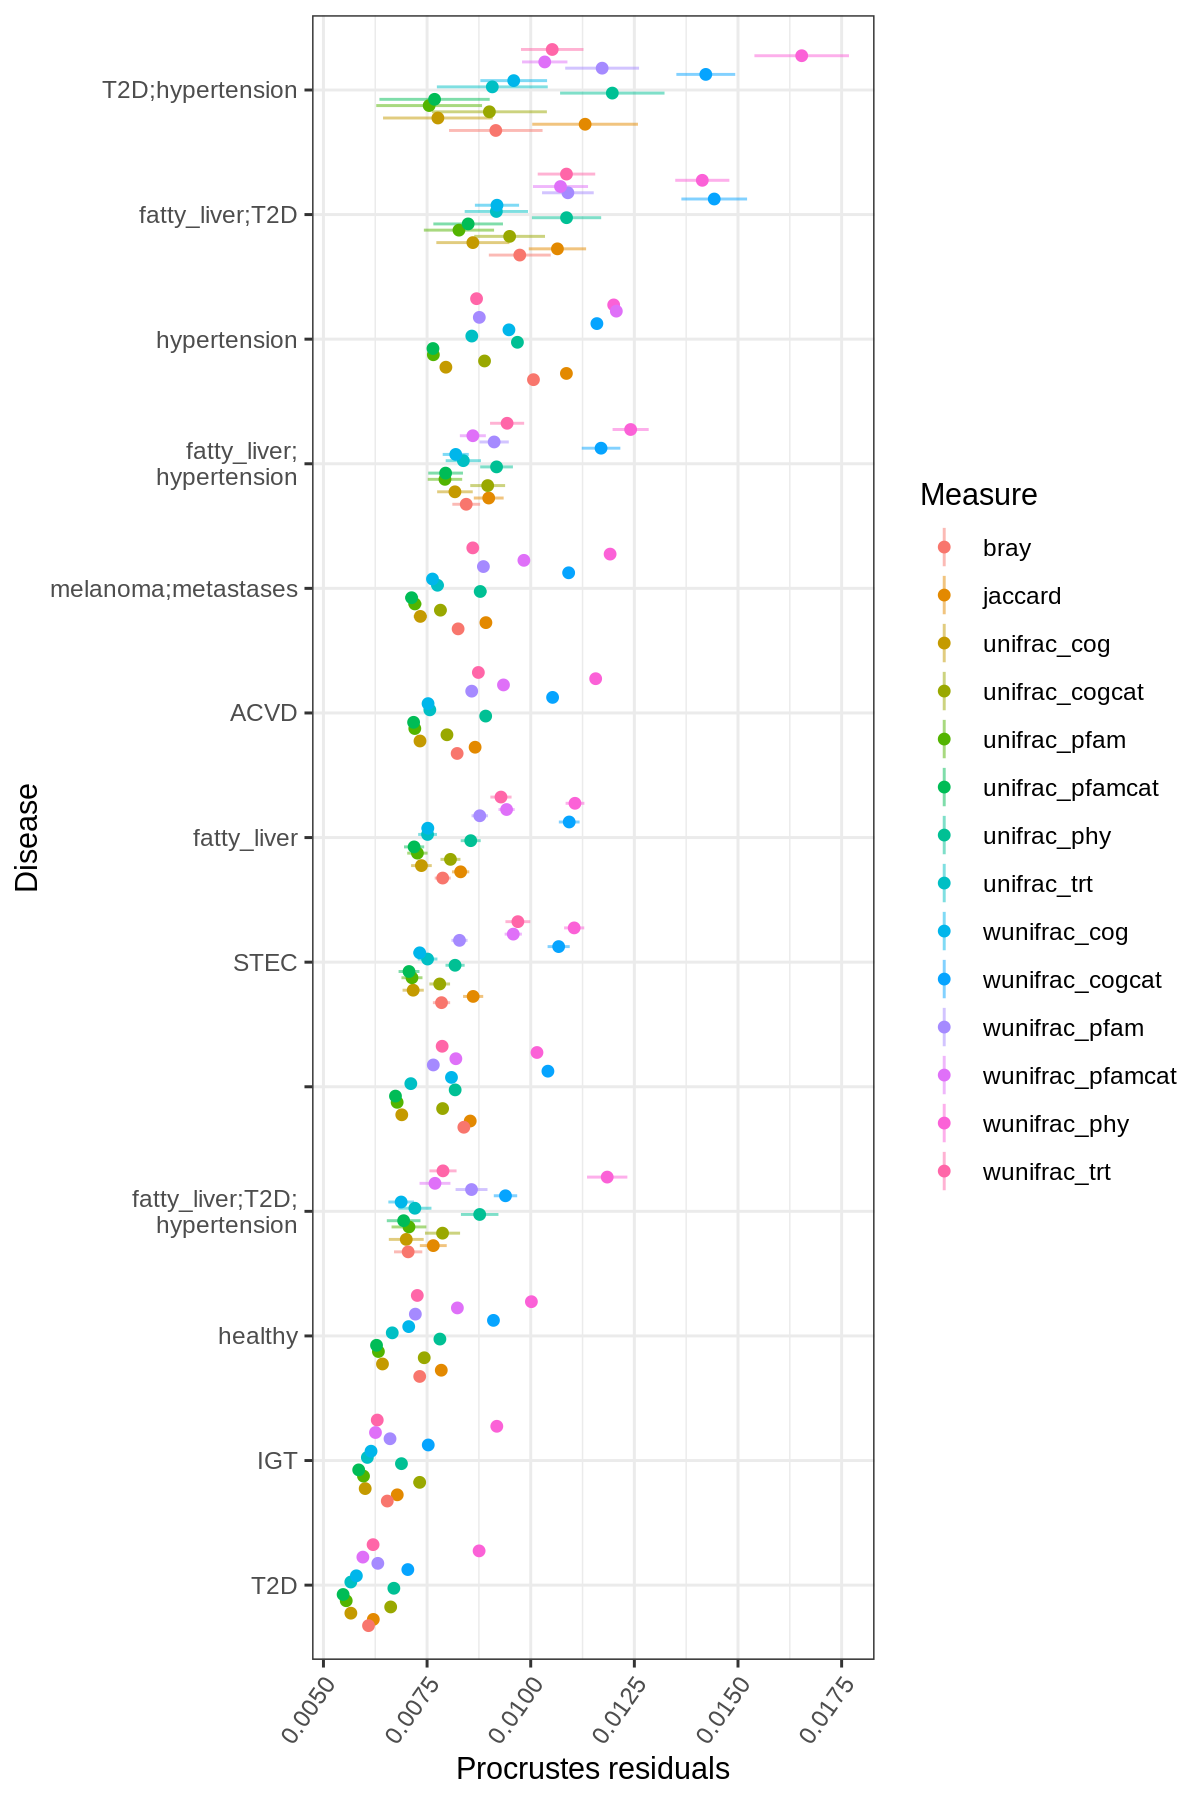

In [37]:
# plotting
p = proc_all_res_s %>%
    mutate.(disease = stringr::str_wrap(gsub(';', '; ', disease), 20),
            disease = gsub('; ', ';', disease)) %>%
    mutate.(disease = reorder(disease, total_mean_res),
            sd_res = ifelse(is.na(sd_res), 0, sd_res)) %>%
    ggplot(aes(disease, mean_res, color=dist_x)) +
    geom_linerange(aes(ymin=mean_res-sd_res,
                       ymax=mean_res+sd_res),
                   position=position_dodge(width=0.7),
                   alpha=0.5) +
    geom_point(position=position_dodge(width=0.7)) +
    scale_color_discrete('Measure') +
    labs(x='Disease', y='Procrustes residuals') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    ) +
    coord_flip()
p.dims(6,9)
plot(p)

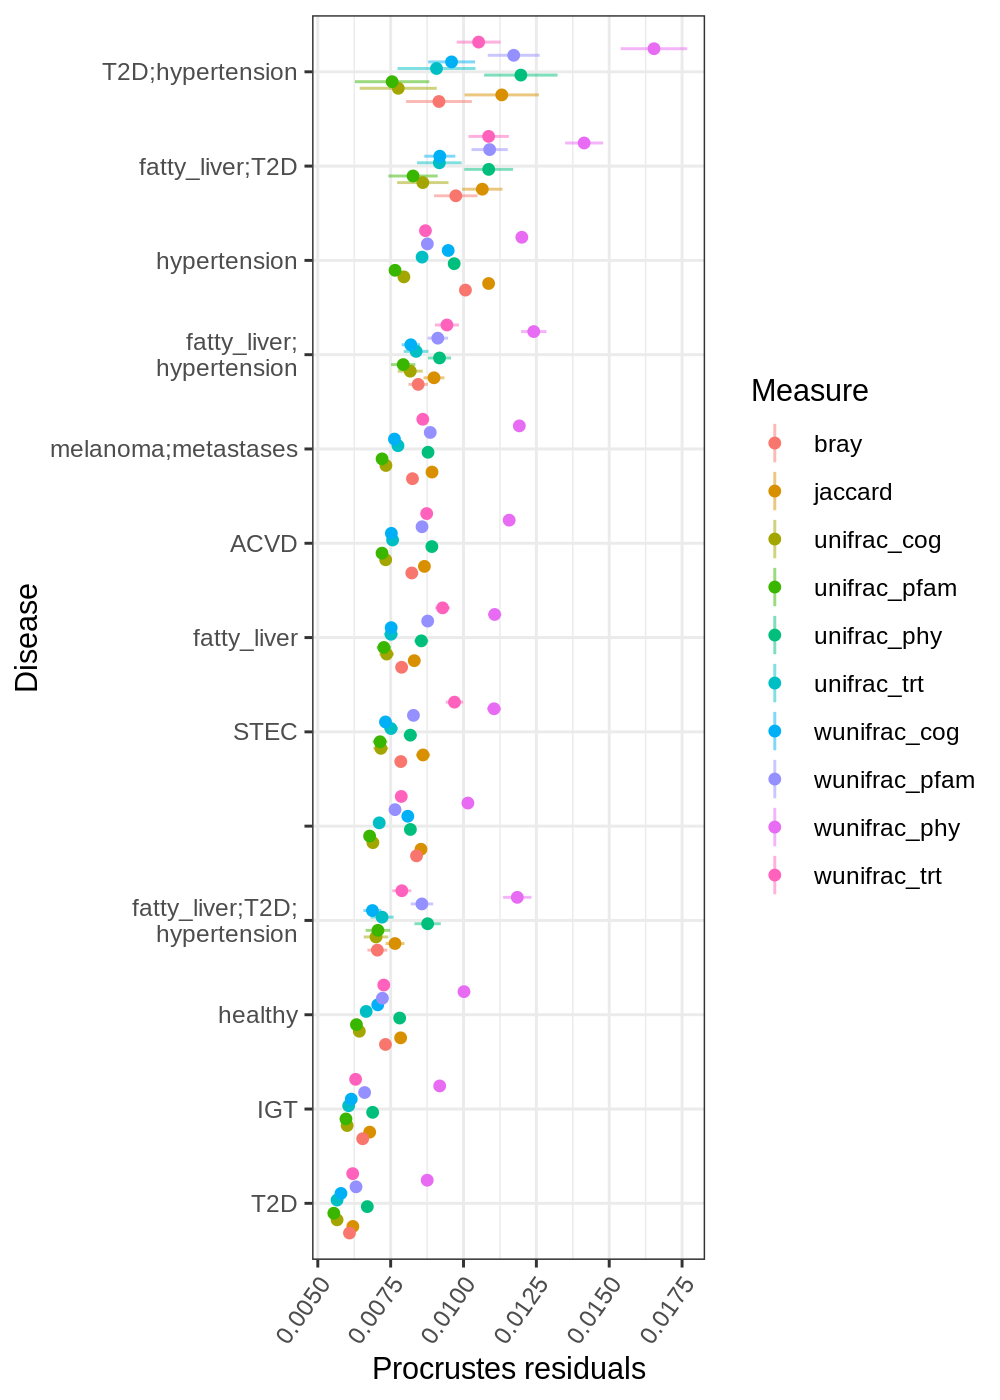

In [38]:
# plotting
p = proc_all_res_s %>%
    filter.(!grepl('cat$', dist_x)) %>%
    mutate.(disease = stringr::str_wrap(gsub(';', '; ', disease), 20),
            disease = gsub('; ', ';', disease)) %>%
    mutate.(disease = reorder(disease, total_mean_res),
            sd_res = ifelse(is.na(sd_res), 0, sd_res)) %>%
    ggplot(aes(disease, mean_res, color=dist_x)) +
    geom_linerange(aes(ymin=mean_res-sd_res,
                       ymax=mean_res+sd_res),
                   position=position_dodge(width=0.7),
                   alpha=0.5) +
    geom_point(position=position_dodge(width=0.7)) +
    scale_color_discrete('Measure') +
    labs(x='Disease', y='Procrustes residuals') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    ) +
    coord_flip()
p.dims(5,7)
plot(p)

In [39]:
# formatting
## summaring, just lower-tri
proc_all_res_s = proc_all_res %>%
    filter.(!is.na(disease)) %>%
    mutate.(total_mean_res = mean(residuals),
            .by=c(study_condition)) %>%
    summarize.(mean_res = mean(residuals),
               sd_res = sd(residuals) / sqrt(length(residuals)), 
               .by=c(dist_x, total_mean_res, study_condition)) %>%
    distinct.(dist_x, study_condition, .keep_all = TRUE)
proc_all_res_s 

dist_x           total_mean_res study_condition mean_res    sd_res      
1   jaccard          0.0076424      control         0.008008651 2.464723e-05
2   unifrac_phy      0.0076424      control         0.007912285 2.604881e-05
⋮   ⋮                ⋮              ⋮               ⋮           ⋮           
125 wunifrac_pfamcat 0.008468507    fatty_liver     0.009587503 0.0002185960
126 bray             0.008468507    fatty_liver     0.007937960 0.0002114755

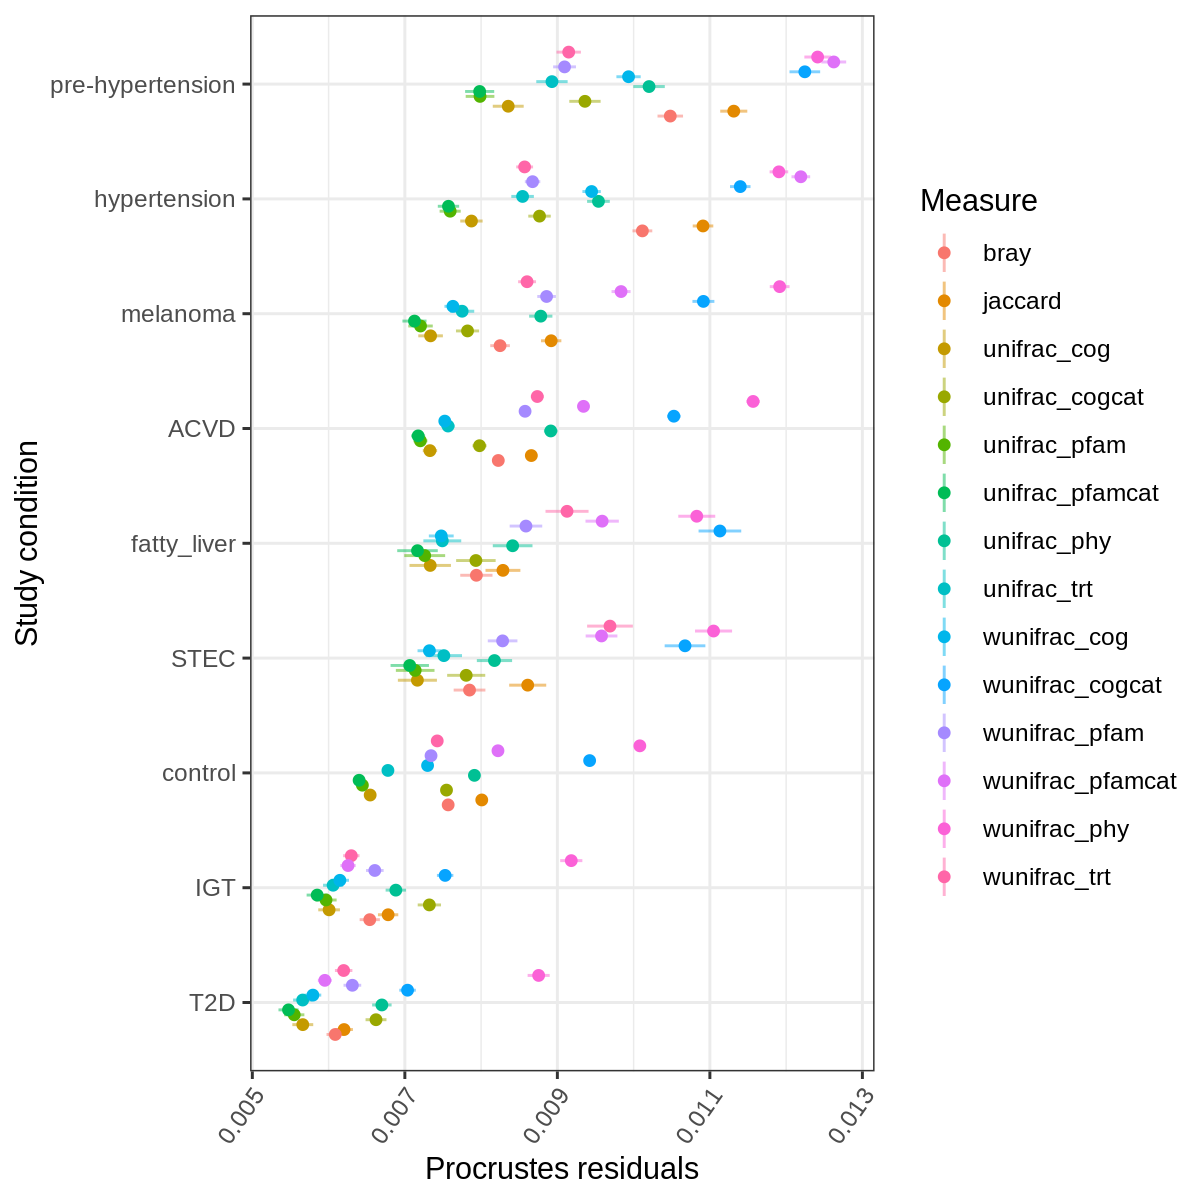

In [40]:
# plotting
p = proc_all_res_s %>%
    mutate.(study_condition = reorder(study_condition, total_mean_res),
            sd_res = ifelse(is.na(sd_res), 0, sd_res)) %>%
    ggplot(aes(study_condition, mean_res, color=dist_x)) +
    geom_linerange(aes(ymin=mean_res-sd_res,
                       ymax=mean_res+sd_res),
                   position=position_dodge(width=0.6),
                   alpha=0.5) +
    geom_point(position=position_dodge(width=0.6)) +
    scale_color_discrete('Measure') +
    labs(x='Study condition', y='Procrustes residuals') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    ) +
    coord_flip()
p.dims(6,6)
plot(p)

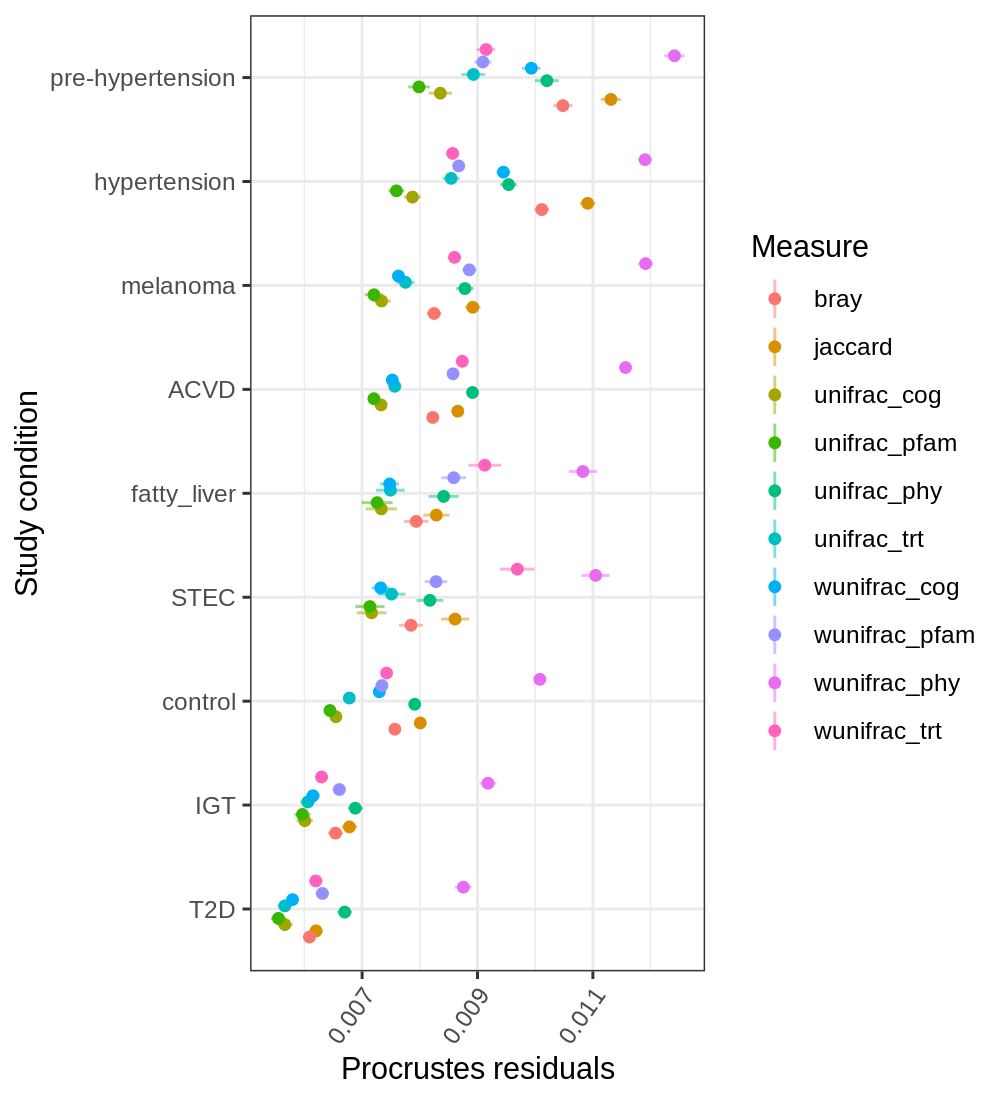

In [41]:
# plotting
p = proc_all_res_s %>%
    filter.(!grepl('cat$', dist_x)) %>%
    mutate.(study_condition = reorder(study_condition, total_mean_res),
            sd_res = ifelse(is.na(sd_res), 0, sd_res)) %>%
    ggplot(aes(study_condition, mean_res, color=dist_x)) +
    geom_linerange(aes(ymin=mean_res-sd_res,
                       ymax=mean_res+sd_res),
                   position=position_dodge(width=0.6),
                   alpha=0.5) +
    geom_point(position=position_dodge(width=0.6)) +
    scale_color_discrete('Measure') +
    labs(x='Study condition', y='Procrustes residuals') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    ) +
    coord_flip()
p.dims(5,5.5)
plot(p)

# Protest

In [25]:
# getPermuteMatrix <- function(perm, N,  strata = NULL){
#     ## 'perm' is either a single number, a how() structure or a
#     ## permutation matrix
#     if (length(perm) == 1) {
#         perm <- how(nperm = perm)
#     }
#     ## apply 'strata', but only if possible: ignore silently other cases
#     if (!missing(strata) && !is.null(strata)) {
#         if (inherits(perm, "how") && is.null(getBlocks(perm)))
#             setBlocks(perm) <- strata
#     }
#     ## now 'perm' is either a how() or a matrix
#     if (inherits(perm, "how"))
#         perm <- shuffleSet(N, control = perm)
#     else { # matrix: check that it *strictly* integer
#         if(!is.integer(perm) && !all(perm == round(perm)))
#            stop("permutation matrix must be strictly integers: use round()")
#     }
#     ## now 'perm' is a matrix (or always was). If it is a plain
#     ## matrix, set minimal attributes for printing. This is a dirty
#     ## kluge: should be handled more cleanly.
#     if (is.null(attr(perm, "control")))
#         attr(perm, "control") <-
#             structure(list(within=list(type="supplied matrix"),
#                            nperm = nrow(perm)), class = "how")
#     perm
# }

# proTest = function(X, Y, scores = "sites", permutations = how(nperm = 99), 
#                    threads=1, progress=FALSE, ...){
#     EPS <- sqrt(.Machine$double.eps)
#     X <- scores(X, display = scores, ...)
#     Y <- scores(Y, display = scores, ...)
#     ## Centre and normalize X & Y here so that the permutations will
#     ## be faster
#     X <- scale(X, scale = FALSE)
#     Y <- scale(Y, scale = FALSE)
#     X <- X/sqrt(sum(X^2))
#     Y <- Y/sqrt(sum(Y^2))
#     ## Transformed X and Y will yield symmetric procrustes() and we
#     ## need not specify that in the call (but we set it symmetric
#     ## after the call).
#     sol <- procrustes(X, Y, symmetric = FALSE)
#     sol$symmetric <- TRUE
#     sol$t0 <- sqrt(1 - sol$ss)
#     N <- nrow(X)

#     ## Permutations: We only need the goodness of fit statistic from
#     ## Procrustes analysis, and therefore we only have the necessary
#     ## function here. This avoids a lot of overhead of calling
#     ## procrustes() for each permutation. The following gives the
#     ## Procrustes r directly.
#     procr <- function(X, Y) sum(svd(crossprod(X, Y), nv=0, nu=0)$d)

#     permutations <- getPermuteMatrix(permutations, N)
#     if (ncol(permutations) != N)
#         stop(gettextf("'permutations' have %d columns, but data have %d observations",
#                       ncol(permutations), N))
#     np <- nrow(permutations)

#     if(threads > 1){
#         plan(multiprocess, workers = threads)
#         perm <- furrr::future_map(as.list(seq_len(np)),
#                                   function(i, A, B, P) procr(A, B[P[i,],]),
#                                   A = X, B = Y, P = permutations,
#                                   .progress = progress)
        
#     } else{
#         perm <- sapply(seq_len(np),
#                    function(i, ...) procr(X, Y[permutations[i,],]))
#     }

#     Pval <- (sum(perm >= sol$t0 - EPS) + 1)/(np + 1)

#     sol$t <- perm
#     sol$signif <- Pval
#     sol$permutations <- np
#     sol$control <- attr(permutations, "control")
#     sol$call <- match.call()
#     class(sol) <- c("protest", "procrustes")
#     sol
# }

In [42]:
# # debug
# data(varespec)
# vare.dist <- vegdist(wisconsin(varespec))
# mds.null <- monoMDS(vare.dist, y = cmdscale(vare.dist))
# mds.alt <- monoMDS(vare.dist)
# vare.proc <- proTest(mds.alt, mds.null, threads=4, 
#                      permutations = how(nperm = 9999), progress=TRUE)
# vare.proc

In [43]:
# # params for jobs
# nperm = 999
# resources = list(h_rt = '36:00:00',
#                  h_vmem = '6G',
#                  threads = '8',
#                  conda.env = '/ebio/abt3_projects/Georg_animal_feces/envs/phyloseq') # conda env with batchtools & furrr installed
# #plan(batchtools_sge, resources=resources, workers=50)
# plan('multicore', workers=threads)

In [44]:
# # pairwise Procrustes
# run_protest = function(x, pcoa_list, nperm=9, threads=1, progress=FALSE){
#     x = as.character(as.matrix(x))
#     y = proTest(pcoa_list[[x[1]]], pcoa_list[[x[2]]], 
#                 symmetric=TRUE, permutations=nperm, 
#                 threads=threads, progress=progress)
#     y = data.frame(dist_x = c(x[1]), dist_y = c(x[2]),
#                    ss = y$ss, signif = y$signif)
#     return(y)
# } %packages% c('vegan')

# ## run in parallel 
# protest_all = pairwise_dists %>%  
#     #head(n=3) %>%   # debug
#     split(seq(nrow(.))) %>%
#     future_map(run_protest, pcoa_list=pcoa_all, nperm=nperm, threads=1) %>%
#     do.call(rbind, .)
# protest_all 

In [32]:
# # saving output: file
# protest_file = file.path(work_dir, 'beta-div_procrustes-sym_protest.qs')

In [33]:
# # saving output
# qs::qsave(protest_all, protest_file, nthreads=threads)
# cat('File written:', protest_file, '\n')

File written: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity//beta-div_procrustes-sym_protest.qs 


In [34]:
# # reload
# protest_all = qs::qread(protest_file, nthreads=threads)
# protest_all

dist_x          dist_y           ss         signif
1   jaccard         bray             0.02620686 0.001 
2   unifrac_phy     bray             0.34643252 0.001 
⋮   ⋮               ⋮                ⋮          ⋮     
181 wunifrac_cogcat wunifrac_pfamcat 0.3228050  0.001 
182 wunifrac_pfam   wunifrac_pfamcat 0.1123822  0.001

In [36]:
# pvalues 
protest_all$ss %>% summary
protest_all$signif %>% summary

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001817 0.138999 0.265985 0.242329 0.343651 0.489286 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.001   0.001   0.001   0.001   0.001   0.001 

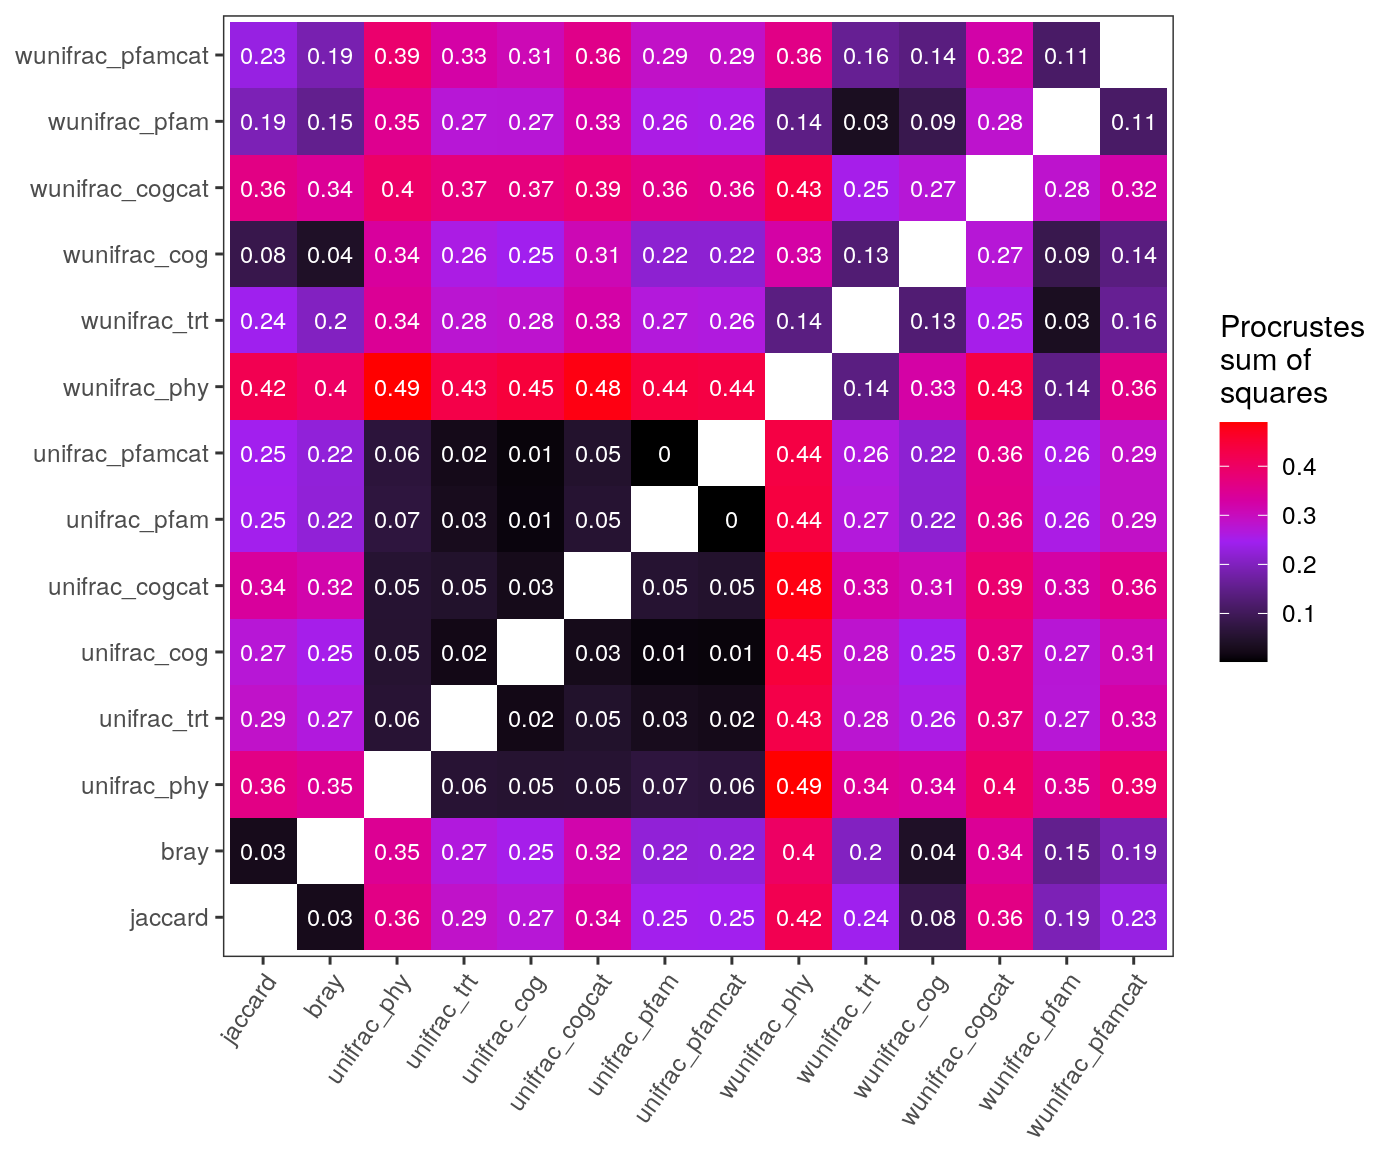

In [49]:
# # plotting results
# levs = c('jaccard', 'bray', 
#          'unifrac_phy', 'unifrac_trt', 'unifrac_cog', 'unifrac_cogcat', 'unifrac_pfam', 'unifrac_pfamcat',
#          'wunifrac_phy', 'wunifrac_trt', 'wunifrac_cog', 'wunifrac_cogcat', 'wunifrac_pfam', 'wunifrac_pfamcat')
# p = protest_all %>%
#     mutate(dist_x = dist_x %>% factor(levels=levs),
#            dist_y = dist_y %>% factor(levels=levs)) %>%
#     ggplot(aes(dist_x, dist_y, fill=ss)) +
#     geom_tile() +
#     geom_text(aes(label=round(ss, 2)), color='white', size=3) +
#     scale_fill_gradientn('Procrustes\nsum of\nsquares', 
#                          colors=c('black', 'purple',  'red')) +
#     theme_bw() +
#     theme(
#         panel.grid = element_blank(),
#         axis.title.x = element_blank(),
#         axis.title.y = element_blank(),
#         axis.text.x = element_text(angle=55, hjust=1)
#     )

# p.dims(7,5.8)
# plot(p)

In [ ]:
send_email('http://127.0.0.1:9702/notebooks/ipynb/02_comm_diversity/03_beta-div_procrustes.ipynb')

# sessionInfo

In [45]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects2/global_metagenome_diversity/envs/phyloseq/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] clustermq_0.8.95.1 LeyLabRMisc_0.2.0  vegan_2.5-7        lattice_0.20-45   
 [5] permute_0.9-5      phyloseq_1.36.0    ape_5.5            purrr_0.3.4       
 [9] tidytable_0.6.5    data.table_1.14.0  ggplot2_3.3.5      tidyr_1.1.3       
[13] dplyr_1.0.7       

loaded vi